## Практическое задание

1. Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf

import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [27]:
np.set_printoptions(edgeitems=20, linewidth=1000, formatter=dict(float=lambda x: "%.3g" % x))

In [28]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
print(train_images[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 25

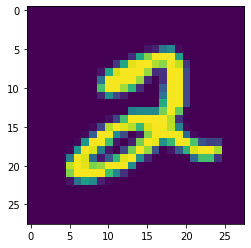

In [31]:
from matplotlib import pyplot as plt
plt.imshow(train_images[5])

In [40]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [41]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [54]:
def create_model(train_images, train_labels, neurons, internal_layers, epochs, verb_param, metric='accuracy'):
    # Build the model.
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(784,)))
    for i in range(internal_layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    
    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=[metric],
    )
    
    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=32,
      verbose=verb_param
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )
    
    
    return model

In [55]:
model = create_model(train_images, train_labels, neurons=64, internal_layers=1, epochs=5, verb_param=1, metric='accuracy')

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3617 - accuracy: 0.8917
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1814 - accuracy: 0.9445
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1391 - accuracy: 0.9565
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1154 - accuracy: 0.9635
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9637


In [56]:
# Save the model to disk.
# model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:55])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:55]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6]


#### Протестируем разные кол-ва нейронов с слоях:

In [58]:
for n in [32, 64, 128, 256, 384]:
    print('Нейронов:', n)
    create_model(train_images, train_labels, neurons=n, internal_layers=1, epochs=5, verb_param=0, metric='accuracy')

Нейронов: 32
313/313 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9500
Нейронов: 64
313/313 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9635
Нейронов: 128
313/313 [==============================] - 0s 935us/step - loss: 0.0980 - accuracy: 0.9696
Нейронов: 256
313/313 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9732
Нейронов: 384
313/313 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9682


Прослеживается реальная зависимость между кол-вом нейронов и значением метрики качества модели. Но, до определенных пределов. На уровне 256 нейронов было максимальное значение метрики. Дальнейшее увеличение кол-ва нейронов только уменьшило значение метрики качества.

#### Протестируем разные кол-ва внутренних слоев сетки:

In [60]:
%%time
for n in [1, 2, 5, 10, 20]:
    print('Кол-во слоев:', n)
    create_model(train_images, train_labels, neurons=64, internal_layers=n, epochs=5, verb_param=0, metric='accuracy')

Кол-во слоев: 1
313/313 [==============================] - 0s 913us/step - loss: 0.1081 - accuracy: 0.9667
Кол-во слоев: 2
313/313 [==============================] - 0s 860us/step - loss: 0.1204 - accuracy: 0.9615
Кол-во слоев: 5
313/313 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9549
Кол-во слоев: 10
313/313 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9619
Кол-во слоев: 20
313/313 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.9241
Wall time: 58.8 s


Какой-либо связи между кол-вом внутренних слоев и значением метрики качества я не увидел.  Даже значение немного падает с ростом слоев. Возможно, что кол-во слоев важно на более крупных датасетах, и там изменение будет заметней. Или с ростом кол-ва слоев нужно увеличивать и другие параметры - например, кол-во нейронов, кол-во эпох и т.д.

#### Протестируем разное кол-во эпох в моделе:

In [61]:
%%time
for n in [1, 5, 10, 20, 50, 100]:
    print('Кол-во эпох:', n)
    create_model(train_images, train_labels, neurons=64, internal_layers=1, epochs=n, verb_param=0, metric='accuracy')

Кол-во эпох: 1
313/313 [==============================] - 0s 937us/step - loss: 0.2139 - accuracy: 0.9375
Кол-во эпох: 5
313/313 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9608
Кол-во эпох: 10
313/313 [==============================] - 0s 861us/step - loss: 0.1089 - accuracy: 0.9683
Кол-во эпох: 20
313/313 [==============================] - 0s 837us/step - loss: 0.1313 - accuracy: 0.9672
Кол-во эпох: 50
313/313 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9731
Кол-во эпох: 100
313/313 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.9743
Wall time: 4min 41s


Увеличение кол-ва эпох существенно влияет на значении метрики качества модели. Скорей всего, здесь есть некий предел, но на протестированных значениях, я его не увидел.

#### Протестируем разные метрики качества в моделе:

In [62]:
%%time
for n in ['accuracy', 'mse', 'mae']:
    print('Используемая метрика:', n)
    create_model(train_images, train_labels, neurons=64, internal_layers=1, epochs=10, verb_param=0, metric=n)

Используемая метрика: accuracy
313/313 [==============================] - 0s 865us/step - loss: 0.0930 - accuracy: 0.9725
Используемая метрика: mse
313/313 [==============================] - 0s 934us/step - loss: 0.1088 - mse: 0.0049
Используемая метрика: mae
313/313 [==============================] - 0s 848us/step - loss: 0.0915 - mae: 0.0070
Wall time: 45.6 s


Поскольку я использовал разные метрики качества, то сложно сказать, как они влияют. Я не уверен, используется ли вообще в обучении указанная метрика качества, или она применяется только для оценки результата...

2. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

Я решил поиграться с Keras по ее документации https://keras.io/guides/functional_api/

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Определяем вид входных данных
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([None, 784])

In [4]:
inputs.dtype

tf.float32

In [5]:
#Определяем первый слой
dense = layers.Dense(64, activation="relu")
#Подаем входные данные
x = dense(inputs)
#Определяем второй слой и подаем на вход данные первого слоя
x = layers.Dense(64, activation="relu")(x)
#Получаем выходные данные
outputs = layers.Dense(10)(x)

In [6]:
outputs.shape

TensorShape([None, 10])

In [17]:
#Создаем модель с определенными выше параметрами и смотрим, что она из себя представляет
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Загружаем тренировочные и тестовые данные
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
#Выполняем нормализацию и reshape
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [23]:
#Обучаем модель на тренировочных данных и получаем значения ошибки и точности для тестовых
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

#Использоваение параметра verbose со значением 0 позволяет скрыть вывод данных по эпохам и увидеть только итоговый результат
history = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2, verbose=0)

test_scores = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1552 - accuracy: 0.9761


In [19]:
#Конфигурация модели
model.get_config()

{'name': 'mnist_model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'dense',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'clas

In [21]:
#Конфигурация модели в json формате
model.to_json()

'{"class_name": "Model", "config": {"name": "mnist_model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "dense", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_nam